#0.Imports

In [1]:
pip install brian2


In [2]:
%matplotlib inline
import numpy as np
from brian2 import *

#1.Hodgkin-Huxely شبکه نورونی



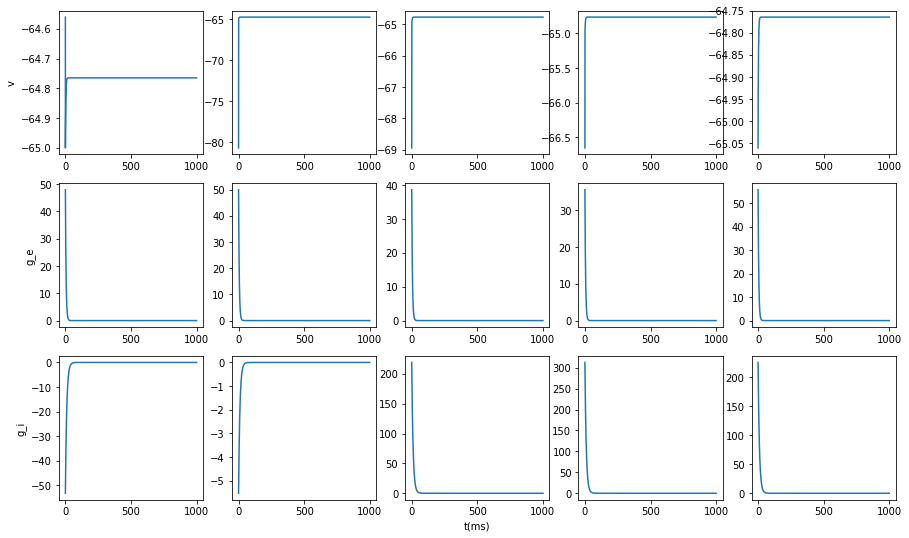

In [ ]:
start_scope()
C_m=200*pF
E_l=-65*mV
E_k=-90*mV
E_Na=50*mV
g_Na=20000/nohm
g_K=6000/nohm
g_l=10/nohm
VT=-63*mV
tau_e=5*ms
tau_i=10*ms
w_e=6/nohm
w_i=67/nohm
E_e=9*mV
E_i=-80*mV
eqs='''
dv/dt=(g_l*(E_l-v)-g_Na*m**3*h*(v-E_Na)-g_K*n**4*(v-E_k)+g_e*(E_e-v)+g_i*(E_i-v))/C_m : volt
dn/dt=alpha_n*(1-n)-beta_n*n : 1
dm/dt=alpha_m*(1-m)-beta_m*m : 1
dh/dt=alpha_h*(1-h)-beta_h*h : 1
alpha_n=0.16/exprel((15*mV-v+VT)/5/mV)/ms : hertz
beta_n=0.5*exp((10*mV-v+VT)/40./mV)/ms : hertz
alpha_m=1.28/exprel((13*mV-v+VT)/4./mV)/ms : hertz
beta_m=1.4/exprel((v-40*mV-VT)/5/mV)/ms : hertz
alpha_h=0.128*exp((17*mV-v+VT)/18./mV)/ms : hertz
beta_h=4/(exp((40*mV-v+VT)/5/mV)+1)/ms : hertz
dg_e/dt=-g_e/tau_e : siemens
dg_i/dt=-g_i/tau_i : siemens
'''
G=NeuronGroup(4000,eqs,threshold='v>-20*mV',refractory='3*ms',method='exponential_euler')
exi=G[:3199]
inh=G[3199:]
S_exi=Synapses(exi,G,on_pre='g_e_post+=w_e')
S_exi.connect(condition='i!=j',p=0.2)
S_inh=Synapses(inh,G,on_pre='g_i_post+=w_i')
S_inh.connect(condition='i!=j',p=0.2)
G.v='E_l-5*mV+(randn()*5)*mV'
G.g_e='40*nS+(randn()*15)*nS'
G.g_i='200*nS+(randn()*120)*nS'
M=StateMonitor(G,('v','g_e','g_i'),(10,100,1000,3200,3998))
run(1000*ms)
figure(figsize=(15,9))
for idx in range(5):
  subplot(3,5,idx+1)
  if idx==0:
    ylabel('v')
  plot(M.t/ms,M.v[idx]/mV)
  subplot(3,5,idx+6)
  if idx==0:
    ylabel('g_e')
  plot(M.t/ms,M.g_e[idx]/nS)
  subplot(3,5,idx+11)
  if idx==0:
    ylabel('g_i')
  if idx==2:
    xlabel('t(ms)')
  plot(M.t/ms,M.g_i[idx]/nS)
show()

#2.شبیه سازی شبکه ی نورونی با سیناپس های تحریکی و مهاری

##2.1

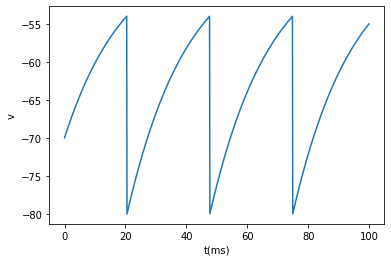

In [ ]:
start_scope()
tau_m=20*ms
E_l=-70*mV
I_eR_m=25*mV
eqs='''
dv/dt=(I_eR_m-(v-E_l))/tau_m : volt
'''
G=NeuronGroup(1,eqs,method='exponential_euler',threshold='v>-54*mV',reset='v=-80*mV')
G.v=E_l
M=StateMonitor(G,'v',True)
run(100*ms)
plot(M.t/ms,M.v[0]/mV)
ylabel('v')
xlabel('t(ms)')
show()

##2.2

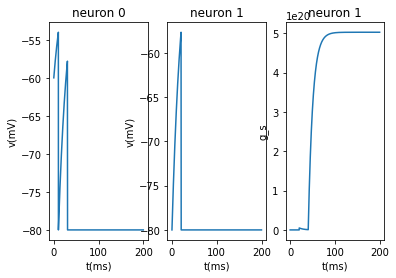

In [ ]:
start_scope()
tau_m=20*ms
E_l=-70*mV
E_s=0*mV
I_eR_m=25*mV
r_m=10*Mohm
eqs='''
dv/dt=(I_eR_m-(v-E_l)-g_s*(v-E_s)*r_m)/tau_m : volt
dg_s/dt=-g_s/10/ms : siemens
'''
G=NeuronGroup(2,eqs,method='exponential_euler',threshold='v>-54*mV',reset='v=-80*mV')
G.v=[-60*mV,-80*mV]
M=StateMonitor(G,('v','g_s'),True)
S=Synapses(G,G,on_pre='g_s_post+=5/nohm',delay=10*ms)
S.connect(condition='i!=j')
run(200*ms)
subplot(1,3,1)
plot(M.t/ms,M.v[0]/mV)
xlabel('t(ms)')
title('neuron 0')
ylabel('v(mV)')

subplot(1,3,2)
plot(M.t/ms,M.v[1]/mV)
xlabel('t(ms)')
title('neuron 1')
ylabel('v(mV)')

subplot(1,3,3)
plot(M.t/ms,M.g_s[1]/nS)
xlabel('t(ms)')
title('neuron 1')
ylabel('g_s')

show()

##2.3

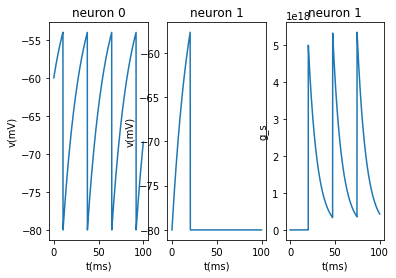

In [ ]:
start_scope()
tau_m=20*ms
E_l=-70*mV
E_s=-80*mV
I_eR_m=25*mV
r_m=10*Mohm
eqs='''
dv/dt=(I_eR_m-(v-E_l)-g_s*(v-E_s)*r_m)/tau_m : volt
dg_s/dt=-g_s/10/ms : siemens
'''
G=NeuronGroup(2,eqs,method='exponential_euler',threshold='v>-54*mV',reset='v=-80*mV')
G.v=[-60*mV,-80*mV]
M=StateMonitor(G,('v','g_s'),True)
S=Synapses(G,G,on_pre='g_s_post+=5/nohm',delay=10*ms)
S.connect(condition='i!=j')
run(100*ms)
subplot(1,3,1)
plot(M.t/ms,M.v[0]/mV)
xlabel('t(ms)')
title('neuron 0')
ylabel('v(mV)')

subplot(1,3,2)
plot(M.t/ms,M.v[1]/mV)
xlabel('t(ms)')
title('neuron 1')
ylabel('v(mV)')

subplot(1,3,3)
plot(M.t/ms,M.g_s[1]/nS)
xlabel('t(ms)')
title('neuron 1')
ylabel('g_s')
show()

#3.بررسی پایداری در سیستم تحریکی⁃مهاری بازگشتی

In [3]:
tau_E=10*ms
M_EE=1.25
M_EI=-1.
gamma_E=-10*hertz
gamma_I=10*hertz
M_IE=1
M_II=0
eqs_E='''
dv_E/dt=(-v_E+clip(M_EE*v_E+M_EI*v_I-gamma_E,0*hertz,inf*hertz))/tau_E : hertz
v_I : hertz (linked)
'''
eqs_I='''
dv_I/dt=(-v_I+clip(M_II*v_I+M_IE*v_E-gamma_I,0*hertz,inf*hertz))/tau_I : hertz
v_E : hertz (linked)
'''

##3.1

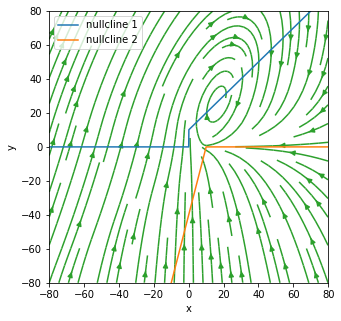

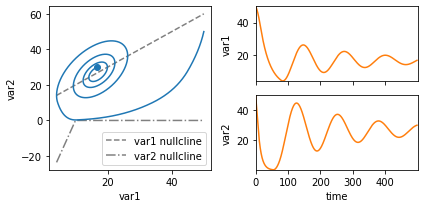

In [ ]:
from draw_utils import *
def dvE_dt(I,E,params):
  return (-E+np.clip(params[0]*E+params[1]*I-params[2],0,np.inf))/params[3]
def dvI_dt(I,E,params):
  return (-I+np.clip(params[4]*E+params[5]*I-params[6],0,np.inf))/params[7]
def vE_null(I,params):
  return np.where(I<(params[2]/params[1]),(params[2]-params[1]*I)/(params[0]-1),0)
def vI_null(I,params):
  return np.where(I>0,(params[6]+(1-params[5])*I)/params[4],0)
start_scope()
tau_I=30*ms
G_E=NeuronGroup(1,eqs_E,method='exponential_euler',name='G_E')
G_I=NeuronGroup(1,eqs_I,method='exponential_euler',name='G_I')
G_I.v_E=linked_var(G_E,'v_E')
G_E.v_E=50*hertz
G_E.v_I=linked_var(G_I,'v_I')
G_I.v_I=50*hertz
M_I=StateMonitor(G_I,'v_I',True)
M_E=StateMonitor(G_I,'v_E',True)
run(500*ms)
params=[M_EE,M_EI,gamma_E/hertz,tau_E/ms,M_IE,M_II,gamma_I/hertz,tau_I/ms]
plot_phaseplane(dvI_dt, dvE_dt, vI_null, vE_null,
                extra_params=params,
                x_range=[-80.,80.],
                y_range=[-80.,80.], step=0.1)
phaseplane_animation(M_I.t/ms, M_I.v_I[0]/hertz, M_E.v_E[0]/hertz,[vI_null,vE_null,params])

##3.2

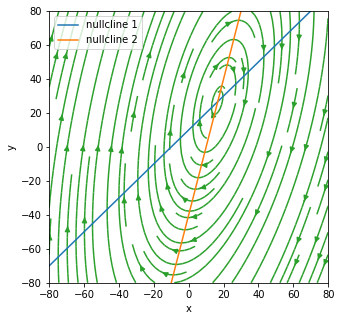

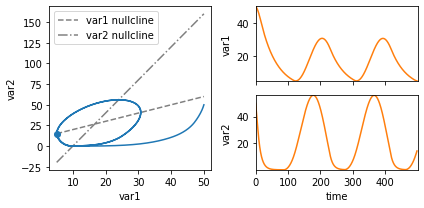

In [ ]:
from draw_utils import *
def dvE_dt(I,E,params):
  return (-E+params[0]*E+params[1]*I-params[2])/params[3]
def dvI_dt(I,E,params):
  return (-I+params[4]*E+params[5]*I-params[6])/params[7]
def vE_null(I,params):
  return (params[2]-params[1]*I)/(params[0]-1)
def vI_null(I,params):
  return (params[6]+(1-params[5])*I)/params[4]
start_scope()
tau_I=50*ms
G_E=NeuronGroup(1,eqs_E,method='exponential_euler',name='G_E')
G_I=NeuronGroup(1,eqs_I,method='exponential_euler',name='G_I')
G_I.v_E=linked_var(G_E,'v_E')
G_E.v_E=50*hertz
G_E.v_I=linked_var(G_I,'v_I')
G_I.v_I=50*hertz
M_I=StateMonitor(G_I,'v_I',True)
M_E=StateMonitor(G_I,'v_E',True)
run(500*ms)
params=[M_EE,M_EI,gamma_E/hertz,tau_E/ms,M_IE,M_II,gamma_I/hertz,tau_I/ms]
plot_phaseplane(dvI_dt, dvE_dt, vI_null, vE_null,
                extra_params=params,
                x_range=[-80.,80.],
                y_range=[-80., 80.], step=0.1)
phaseplane_animation(M_I.t/ms, M_I.v_I[0]/hertz, M_E.v_E[0]/hertz,[vI_null,vE_null,params])

##3.3

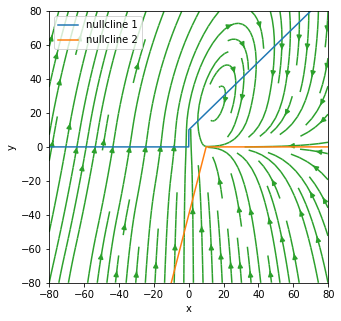

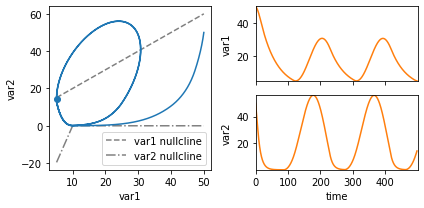

In [4]:
from draw_utils import *
def dvE_dt(I,E,params):
  return (-E+np.clip(params[0]*E+params[1]*I-params[2],0,np.inf))/params[3]
def dvI_dt(I,E,params):
  return (-I+np.clip(params[4]*E+params[5]*I-params[6],0,np.inf))/params[7]
def vE_null(I,params):
  return np.where(I<(params[2]/params[1]),(params[2]-params[1]*I)/(params[0]-1),0)
def vI_null(I,params):
  return np.where(I>0,(params[6]+(1-params[5])*I)/params[4],0)
start_scope()
tau_I=50*ms
G_E=NeuronGroup(1,eqs_E,method='exponential_euler',name='G_E')
G_I=NeuronGroup(1,eqs_I,method='exponential_euler',name='G_I')
G_I.v_E=linked_var(G_E,'v_E')
G_E.v_E=50*hertz
G_E.v_I=linked_var(G_I,'v_I')
G_I.v_I=50*hertz
M_I=StateMonitor(G_I,'v_I',True)
M_E=StateMonitor(G_I,'v_E',True)
run(500*ms)
params=[M_EE,M_EI,gamma_E/hertz,tau_E/ms,M_IE,M_II,gamma_I/hertz,tau_I/ms]
plot_phaseplane(dvI_dt, dvE_dt, vI_null, vE_null,
                extra_params=params,
                x_range=[-80.,80.],
                y_range=[-80.,80.], step=0.1)
phaseplane_animation(M_I.t/ms, M_I.v_I[0]/hertz, M_E.v_E[0]/hertz,[vI_null,vE_null,params])

#4

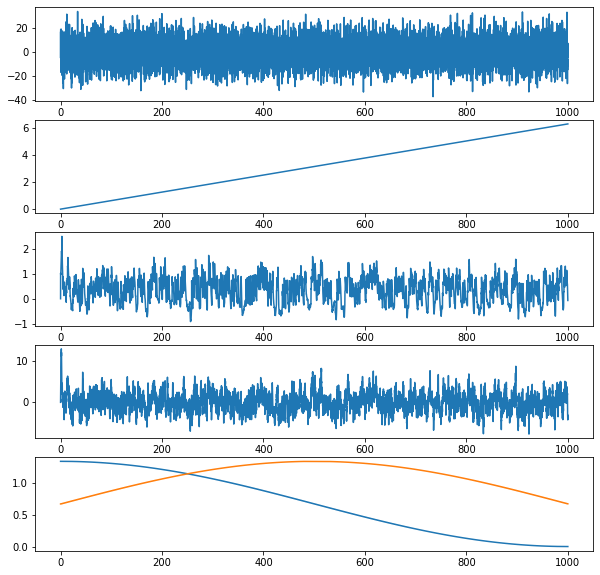

In [7]:
start_scope()
eqs_ear='''
dx/dt=(sound(t-delay)-x)/ms : 1
dtheta/dt= 2*pi/second : 1
delay : second
'''
eqs_neurons='''
dv/dt=-v/1/ms+0.1*x*2/ms : 1
x : 1 (linked)
'''
sound=TimedArray(10 * randn(50000), dt=defaultclock.dt)
G_ear=NeuronGroup(2,eqs_ear,method='exponential_euler',threshold='x>1',refractory='2.5*ms')
G_ear.theta=0
G_ear.delay='20*cm*abs(sin(theta/2)**i+cos(theta/2)**(1-i))/(300*metre/second)'
G_ear.run_regularly('delay=20*cm*abs(sin(theta/2)**i+cos(theta/2)**(1-i))/(300*metre/second)',dt=1*ms)
G_neu=NeuronGroup(2,eqs_neurons,method='exponential_euler')
G_neu.v=0
G_neu.x=linked_var(G_ear,'x')
synapses = Synapses(G_ear, G_neu, on_pre='v += .5')
synapses.connect()
M_e=StateMonitor(G_ear,('x','theta','delay'),True)
M_n=StateMonitor(G_neu,'v',True)
run(1000*ms)
figure(figsize=(10,10))
subplot(5,1,1)
plot(M_e.t/ms,sound.values[:10000])
subplot(5,1,2)
plot(M_e.t/ms,M_e.theta[0])
subplot(5,1,3)
plot(M_n.t/ms,M_n.v[0])
subplot(5,1,4)
plot(M_e.t/ms,M_e.x[0])
subplot(5,1,5)
plot(M_e.t/ms,M_e.delay[0]/ms)
plot(M_e.t/ms,M_e.delay[1]/ms)
show()